In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


##### OBJECTIVE #####

# Does the home stadium ground give any advantage? And if the answer is yes, what’s the quantity for this advantage?
# What is the best way to collect points, defensive or attacking play?
# Who is the best club manager in PL history?

/kaggle/input/premier-league-matches-19922022/eplmatches.csv


In [ ]:
# loading the data

pl_df = pd.read_csv('/kaggle/input/premier-league-matches-19922022/eplmatches.csv')
pl_df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


**Now as our Dataframe is set. Let's explore different Teams and the relation between the goals score while playing Home and Away matches. For a better visualisation, a few columns have been added based on the current data frame:**

In [ ]:
##### To categorizing the result of each match into home team won, the away team won, or drew:
pl_df['Result'] = np.where(pl_df['FTR'] == 'H','HomeTeamWin', np.where(pl_df['FTR'] == 'A', 'AwayTeamWin', "Draw"))

##### Now identify the winner of each match: 
# if "H"- the home team was the winner, if "A" the away team was the winner, else draw:
pl_df['Winner'] = np.where(pl_df['FTR'] == 'H',pl_df['Home'], np.where(pl_df['FTR'] == 'A', pl_df['Away'], "Draw"))

##### To identify how many goals did the winner had:
pl_df['WinnerGoals'] = np.where(pl_df['FTR'] == 'H',pl_df['HomeGoals'], np.where(pl_df['FTR'] == 'A', pl_df['AwayGoals'], pl_df['HomeGoals']))

##### To get the total number of goals in each match and the goal differences:
pl_df['TotalGoal'] = pl_df['HomeGoals'] + pl_df['AwayGoals']
pl_df['GoalDif']= pl_df['HomeGoals']- pl_df['AwayGoals']

##### Creating a saparate Home and Away points table for Points per Goal analysis for each match
pl_df['HG_points'] = np.where(pl_df['Result'] == 'HomeTeamWin',3, np.where(pl_df['Result'] == 'AwayTeamWin', 0, 1))
pl_df['AG_points'] = np.where(pl_df['Result'] == 'HomeTeamWin',0, np.where(pl_df['Result'] == 'AwayTeamWin', 3, 1))

In [ ]:
pl_df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,Result,Winner,WinnerGoals,TotalGoal,GoalDif,HG_points,AG_points
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,HomeTeamWin,Coventry City,2,3,1,3,0
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,HomeTeamWin,Leeds United,2,3,1,3,0
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,HomeTeamWin,Sheffield Utd,2,3,1,3,0
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw,Draw,3,6,0,1,1
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,AwayTeamWin,Norwich City,4,6,-2,0,3


In [ ]:
# Counting Home Goals scored by All Teams 
home_goal_count = pl_df.groupby(['Home'])['HomeGoals'].sum().reset_index()
home_goal_count.columns = ['index','Home Goals']

# Counting Away Goals scored by All Teams 
away_goal_count = pl_df.groupby(['Away'])['AwayGoals'].sum().reset_index()
away_goal_count.columns = ['index','Away Goals']

##### Merging above dataframes to create a dataframe to know teams who scored most both H & A goals in all fixtures since 1993 season
total_goals_scored = pd.merge(home_goal_count, away_goal_count ,how ='right',on ='index')
total_goals_scored.sort_values(by=['Home Goals','Away Goals'], ascending = False).head()


,index,Home Goals,Away Goals
27,Manchester Utd,1214,971
25,Liverpool,1156,865
0,Arsenal,1154,863
14,Chelsea,1121,852
43,Tottenham,995,750


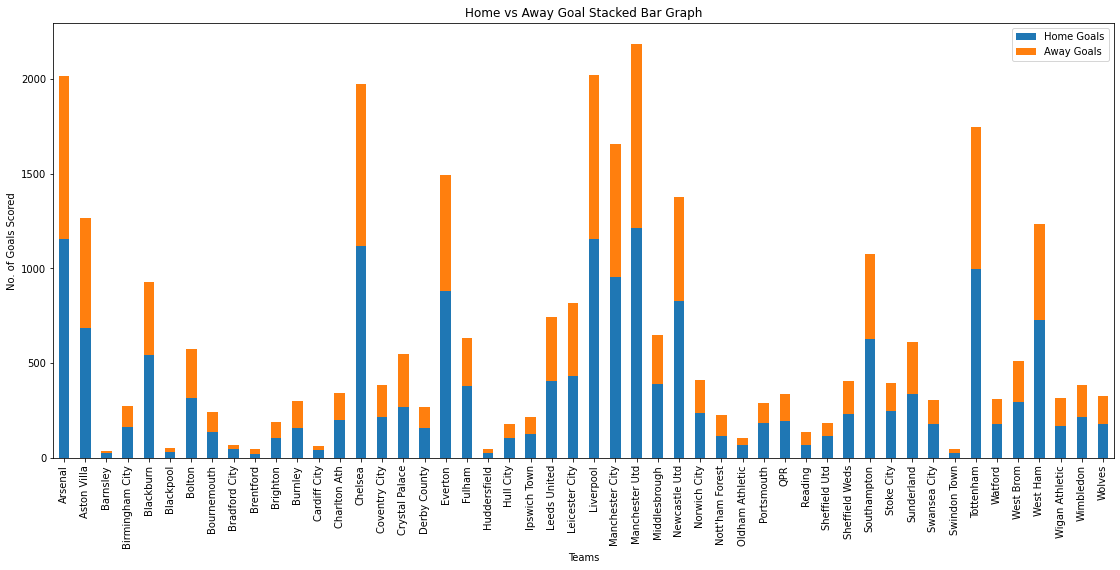

In [ ]:
##### Visualise the chart in stack manner of bar type

plt.rcParams['figure.figsize'] = [19, 8]
total_goals_scored.plot(x='index', kind='bar', stacked=True, title='Home vs Away Goal Stacked Bar Graph')
plt.xlabel('Teams')
plt.ylabel('No. of Goals Scored')
plt.show()

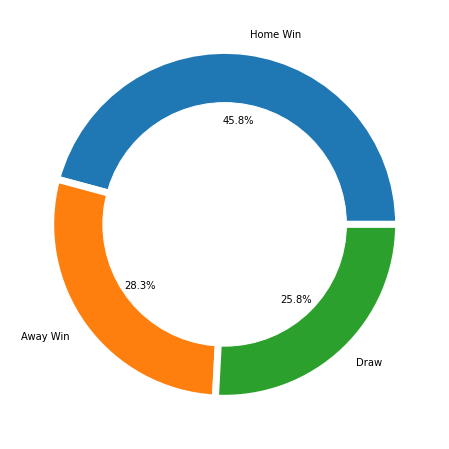

In [ ]:
##### As per teams point of view
total_matches = len(pl_df['Result'])
home_win_per = round((pl_df[pl_df.Result =='HomeTeamWin'].count()[0]/total_matches)*100,3)
away_win_per = round((pl_df[pl_df.Result =='AwayTeamWin'].count()[0]/total_matches)*100,3)
draw_matches = round((pl_df[pl_df.Result =='Draw'].count()[0]/total_matches)*100,3)

# Create a pie plot for better Visualization
plt.rcParams['figure.figsize'] = [19, 8]
names = ['Home Win', 'Away Win', 'Draw']
complied_data = home_win_per, away_win_per, draw_matches

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(complied_data, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, autopct="%.1f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

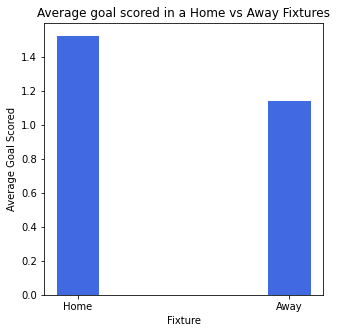

In [ ]:
##### Average goal scored in a Home vs Away Fixtures

plt.rcParams['figure.figsize'] = [5, 5]
fixtures = 'Home','Away'
avg_goals = pl_df['HomeGoals'].mean(), pl_df['AwayGoals'].mean()

plt.bar(fixtures, avg_goals, color ='royalblue', width = 0.2)
plt.xlabel("Fixture")
plt.ylabel("Average Goal Scored")
plt.title("Average goal scored in a Home vs Away Fixtures")
plt.show()

In [ ]:
# Avg Goal scored by top 5 teams while playing in Home Condition 
home_goal_rate = pl_df.groupby('Home').mean()['HomeGoals'].reset_index().rename(columns={'Home':'Teams'})
# Avg Goal scored by top 5 teams while playing in Home Condition 
away_goal_rate = pl_df.groupby('Away').mean()['AwayGoals'].reset_index().rename(columns={'Away':'Teams'})
# Now Joing the table
avg_goal = home_goal_rate.merge(away_goal_rate, how ='right', on='Teams').sort_values(by=['HomeGoals',
                                                                                          'AwayGoals'], 
                                                                                      ascending = False, 
                                                                                      ignore_index=True)
avg_goal.head()

,Teams,HomeGoals,AwayGoals
0,Manchester Utd,2.107639,1.685764
1,Liverpool,2.006944,1.501736
2,Arsenal,2.003472,1.498264
3,Manchester City,1.989605,1.457380
4,Chelsea,1.946181,1.479167


The one good observation from this above data that teams certainly like playing in Home condition and it boost there goal scoring rate. Take Example of Manchester united, who is the best team to count on. They are leading the way to hammar goals both on Away and Home condition. 

In [ ]:
##### Let’s do some more. What is the average for home and away goals during home and away wins?
new_df = pl_df[['HomeGoals','AwayGoals','Result','HG_points','AG_points']]
avg_goals = new_df.groupby('Result').mean()
avg_goals

,HomeGoals,AwayGoals,HG_points,AG_points
Result,,,,
AwayTeamWin,0.571645,2.269009,0.0,3.0
Draw,0.969103,0.969103,1.0,1.0
HomeTeamWin,2.419306,0.537957,3.0,0.0


**This concludes, The home stadium ground does give advantage to the team and are more likely to score goals at there own turf. When a team plays at Home you can expect 0.15 more goals compaired to away games. The chance of winning the game when you play at Home reaches almost 45.8% compaired to Away games at only 28.3% respectivly while there is still a hefty 25.8% chance they endup bottling up the match.**

**As per the above analysis, Even if you win away, the home team will still score more often than not. So you’ll need to score at least 2 most of the time. Same for home wins too, although teams winning at home score slightly less than teams winning away.**

# Offense or Defense?

In [ ]:
# To Check the Tactical approch by All the team while playing AWAY and HOME games we have to compair 
# the Number of goals they have to score to insure a victory points

# Here we will analyse the Offensive approch where both opposing team have 
# conceded but also scored goals keeping there engines running to get Match Point in a same match.

offensive_play = pl_df.loc[(pl_df.HomeGoals !=0) & (pl_df.AwayGoals !=0)]
HO_play_pnt = offensive_play.groupby(['HomeGoals'])['HG_points'].mean()

AO_play_pnt = offensive_play.groupby(['AwayGoals'])['AG_points'].mean()

Home_Away_offensive_play = pd.concat([AO_play_pnt, HO_play_pnt], axis=1
                                    ).rename(columns={'AG_points':'AO_points','HG_points':'HO_points'})


# Now let`s analyse Defensive Plays, where atleast one of the team kept there defense tight 
# yet successfully scoring the winning goal/s in the match.

defensive_play = pl_df.loc[(pl_df.HomeGoals ==0) | (pl_df.AwayGoals ==0)]
HD_play_pnt = defensive_play.groupby(['HomeGoals'])['HG_points'].mean()

AD_play_pnt = defensive_play.groupby(['AwayGoals'])['AG_points'].mean()

Home_Away_defensive_play = pd.concat([HD_play_pnt, AD_play_pnt], axis=1
                                    ).rename(columns={'AG_points':'AD_points','HG_points':'HD_points'})

In [ ]:
Offensive_or_defensive

,AO_points,HO_points,HD_points,AD_points
0,NaN,NaN,0.348922,0.239829
1,0.424433,0.530291,3.000000,3.000000
2,1.622209,1.932440,3.000000,3.000000
3,2.366120,2.613147,3.000000,3.000000
4,2.783920,2.901070,3.000000,3.000000
5,2.961538,2.981818,3.000000,3.000000
6,3.000000,3.000000,3.000000,3.000000
7,3.000000,3.000000,3.000000,3.000000
8,3.000000,3.000000,3.000000,NaN
9,NaN,3.000000,3.000000,3.000000


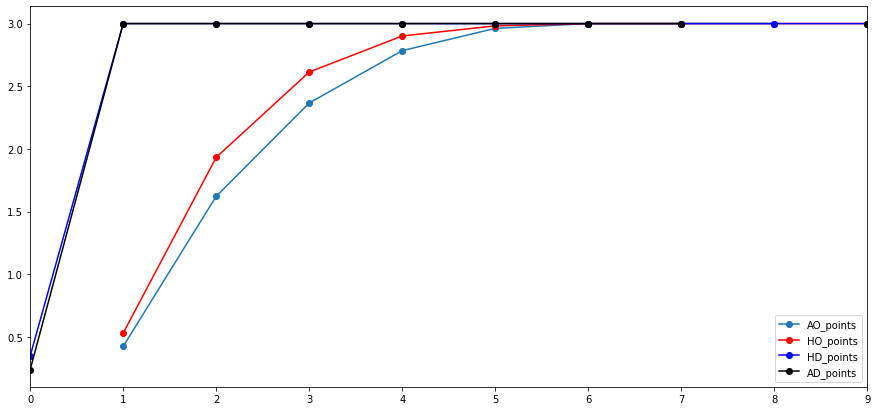

In [ ]:
Offensive_or_defensive = pd.concat([Home_Away_offensive_play, Home_Away_defensive_play], axis=1)
plt.rcParams['figure.figsize'] = [15, 7]
ax = plt.gca()

Offensive_or_defensive.plot(kind='line',y='AO_points',marker="o", ax=ax)
Offensive_or_defensive.plot(kind='line',y='HO_points', marker="o", color='red', ax=ax)
Offensive_or_defensive.plot(kind='line',y='HD_points', marker="o",  color='blue', ax=ax)
Offensive_or_defensive.plot(kind='line',y='AD_points', marker="o",  color='black', ax=ax)
plt.xlim(0, 9)
plt.show()

**The result above is interesting as we see that the Team which scored the goal and kept there defense tight will highly likely take 3 points and keep a clean sheet. The chance of winning becomes almost perfect when they lead 1 - 0 w.r.t all them whether they play Home or Away. On the other hand, When both teams play offensive tactical play, They have to fight for a win till the end where they have to score atleast 4 goals while they have conceded a certain amount of goal.**

**Thus, it’s very effective proof of how defensive play is. more effective when it comes to collecting points.**

# Now, Let`s figure out who is the All-time Best Premier League Manager (1993-2022 Season)

**Match Section**

In [ ]:
##### Number of season played by teams

season_played = pl_df.groupby(['Home'])['Season_End_Year'].nunique().reset_index(name ='Seasons'
                                                                                ).rename(columns={'Home':'index'})

##### Let`s Calculate the Total Matches Played by all Teams in between 1993-2022 Season
home_matches = pl_df['Home'].value_counts()
away_matches = pl_df['Away'].value_counts()
total_matches_played = (home_matches + away_matches).reset_index(name = 'Matches Played')


##### Let`s Calculate the Number matches Won by teams
team_result = pl_df.groupby('Winner')['Winner'].count().reset_index(name = "Won")
# Drop the results which were "Draw" as this data is not required
matches_won = team_result[team_result.Winner != 'Draw'].rename(columns={'Winner':'index'})


##### Same for the Total Matches Drawn in both AWAY and HOME fixtures combined
away_matches_draw = pl_df.groupby(['Away'])['Winner'].apply(lambda x: (x=='Draw').sum()
                                                           ).reset_index(name = 'Draw').rename(columns={'Away':'index'})
home_matches_draw = pl_df.groupby(['Home'])['Winner'].apply(lambda x: (x=='Draw').sum()
                                                           ).reset_index(name = 'Draw').rename(columns={'Home':'index'})
matches_drew = pd.concat([away_matches_draw, home_matches_draw])


############ Stacking up Match_Dataframe ############

match_df = season_played.merge(total_matches_played, how='right', on = 'index')
match_df2 = match_df.merge(matches_won, how='right', on = 'index')
match_df3 = match_df2.merge(matches_drew, how='right', on = 'index')
match_df3['Loss'] = match_df3['Matches Played'] - match_df3['Won'] - match_df3['Draw']

In [ ]:
# Check-Point
# match_df3.head()

**Goal Section**

In [ ]:
##### Goals scored by Teams 
total_goals_scored['GF'] = total_goals_scored['Home Goals'
                                                     ] + total_goals_scored['Away Goals']

##### Goals conceded by Teams
# First, Counting Goals conceded at Home by All Teams 
home_goal_conceded = pl_df.groupby(['Home'])['AwayGoals'].sum().reset_index()
home_goal_conceded.columns = ['index','Goals conceded at Home']

# Counting Goals conceded at Away by All Teams 
away_goal_conceded = pl_df.groupby(['Away'])['HomeGoals'].sum().reset_index()
away_goal_conceded.columns = ['index','Goals conceded at Away']

# Merging above dataframes to create a dataframe to know teams who conceded most in 
# both H & A goals in all fixtures since 1993 season

total_goal_conceded = pd.merge(home_goal_conceded, away_goal_conceded, how ='right',on ='index')
total_goal_conceded['GA'] = total_goal_conceded['Goals conceded at Home'
                                                           ] + total_goal_conceded['Goals conceded at Away']

##### Now merging both goal scored and conceded in a single dataframe

goal_history = pd.merge(total_goals_scored, total_goal_conceded, how ='right',on ='index')
all_time_goal_history = goal_history[['index','GF','GA']]
all_time_goal_history['GD'] = all_time_goal_history['GF'] - all_time_goal_history['GA']

In [ ]:
# Check-Point
# all_time_goal_history.head()

In [ ]:
# Now creating the All Time Ranking Table from 1993-2022 Season 

all_time_pl_table = match_df3.merge(all_time_goal_history, how ='right',on ='index').rename(columns={'index':'Team'})
all_time_pl_table.drop_duplicates(subset=['Team'], keep='first', inplace=True, ignore_index=True)

# In EPL, Three points are awarded for a win, one point for a draw and none for a defeat
all_time_pl_table['Points'] = (match_df3['Won'])*3 + (match_df3['Loss']*1)
# Addition columns to show win% of the teams 
all_time_pl_table['Win%'] = round((match_df3['Won']/match_df3['Matches Played'])*100,2)

In [ ]:
all_time_pl_table.sort_values(by='Points', ascending = False, ignore_index=True)

,Team,Seasons,Matches Played,Won,Draw,Loss,GF,GA,GD,Points,Win%
0,Manchester Utd,30,1152,703,147,302,2185,1066,1119,2411,61.02
1,Chelsea,30,1152,618,141,393,1973,1125,848,2247,53.65
2,Arsenal,30,1152,619,153,380,2017,1148,869,2237,53.73
3,Liverpool,30,1152,609,145,398,2021,1147,874,2225,52.86
4,Tottenham,30,1152,502,149,501,1745,1438,307,2007,43.58
5,Everton,30,1152,418,166,568,1491,1481,10,1822,36.28
6,Manchester City,25,962,473,113,376,1658,1068,590,1795,49.17
7,Newcastle Utd,27,1034,382,136,516,1377,1417,-40,1662,36.94
8,Aston Villa,27,1038,354,145,539,1265,1353,-88,1601,34.10
9,West Ham,26,996,335,129,532,1235,1429,-194,1537,33.63


**The most successful manager in the Premier League is Alex Ferguson of Manchester United, who won 13 titles - more than three times as many as any other manager - between 1993 and 2013. Man Utd has winning output of 61.02% and highest points collected which is more than enough to give them a Legendary status.** 

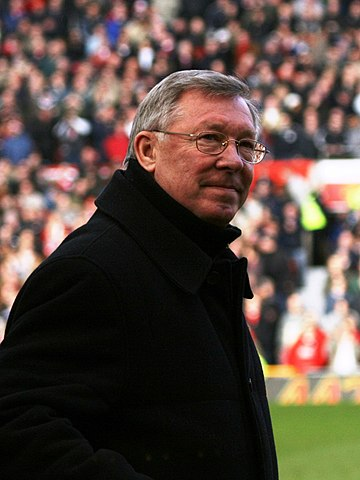

**Here we are at the end of our data analysis project for Premier League Matches. The All Time Premier League Table (1993-2022) clearly shows Manchester United to be one of the most successful teams in EPL history.**